There do seem to be legitimate cases of negative CPRs. I'm going to remove them from the dataset, in the absence of a better idea.

In [1]:
import os
os.chdir("/home/charles/src/LondonMirror/Prepayments/")

import prepayments as pp
import numpy as np
import pandas as pd
import ggplot as gg
import datetime

pm = pp.models.PoolModel()

samples = [(pm.data_pool.h5file.root.pools[i]['pool_number'],
            pd.Timestamp.fromtimestamp(pm.data_pool.h5file.root.pools[i]['as_of_date']))
           for i in np.random.choice(14151801,11000)]
samples = [x for x in samples if x[1] > pd.Timestamp("2012-08-01")]
len(samples)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


9659

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import cPickle as pickle

In [4]:
samples[0]

('321345', Timestamp('2013-02-01 00:00:00'))

In [5]:
pm.data_for_pool_number(*samples[0])

{'burnout': 470732.23189050669,
 'cato': -0.3037000000000003,
 'hpa': -0.079420859526456417,
 'incentive': 5239.8759241657226,
 'lockin': 0.34501550947928467,
 'next_month_cpr': -0.0015248990802045892,
 'next_month_smm': -0.00012698619558203759,
 'sato': 4449.9930071799999,
 'seasonality': 2,
 'upfront_mip': 0}

In [6]:
data = {(i,dt):pm.data_for_pool_number(i,dt) for i,dt in samples}
#pickle.dump(data, open("/media/gdaa/Charles/prepayment/sample_data2.pickle", "wb"))

ERROR:root:Weighted avg loan age is missing for 498809, 2013-10-01
ERROR:root:Weighted Average Coupon is missing for 645531, 2013-01-01
ERROR:root:Weighted Average Coupon is missing for 506337, 2014-09-01
ERROR:root:Weighted Average Coupon is missing for AC7114, 2014-09-01
ERROR:root:Weighted Average Coupon is missing for AG5158, 2015-03-01
ERROR:root:Weighted Average Coupon is missing for 681530, 2015-01-01
ERROR:root:Weighted Average Coupon is missing for 725595, 2015-10-01
ERROR:root:Weighted Average Coupon is missing for 768207, 2015-06-01
ERROR:root:Weighted Average Coupon is missing for 781801, 2015-05-01
ERROR:root:Weighted Average Coupon is missing for 597512, 2013-10-01
ERROR:root:Weighted Average Coupon is missing for AH1328, 2014-10-01
ERROR:root:Weighted Average Coupon is missing for 626420, 2016-12-01
ERROR:root:Weighted Average Coupon is missing for 565450, 2016-02-01
ERROR:root:Weighted Average Coupon is missing for 763942, 2016-07-01
ERROR:root:Weighted Average Coupon i

In [7]:
jim = pd.DataFrame.from_dict({k:v for k,v in data.items() if v is not None}, orient="index")

In [8]:
jim = jim.where(jim.next_month_cpr >= 0).dropna()

In [9]:
jim.to_csv("/media/gdaa/Charles/prepayment/sample_data2.csv")
jim.to_csv("/data/prepayments/samples2.csv")

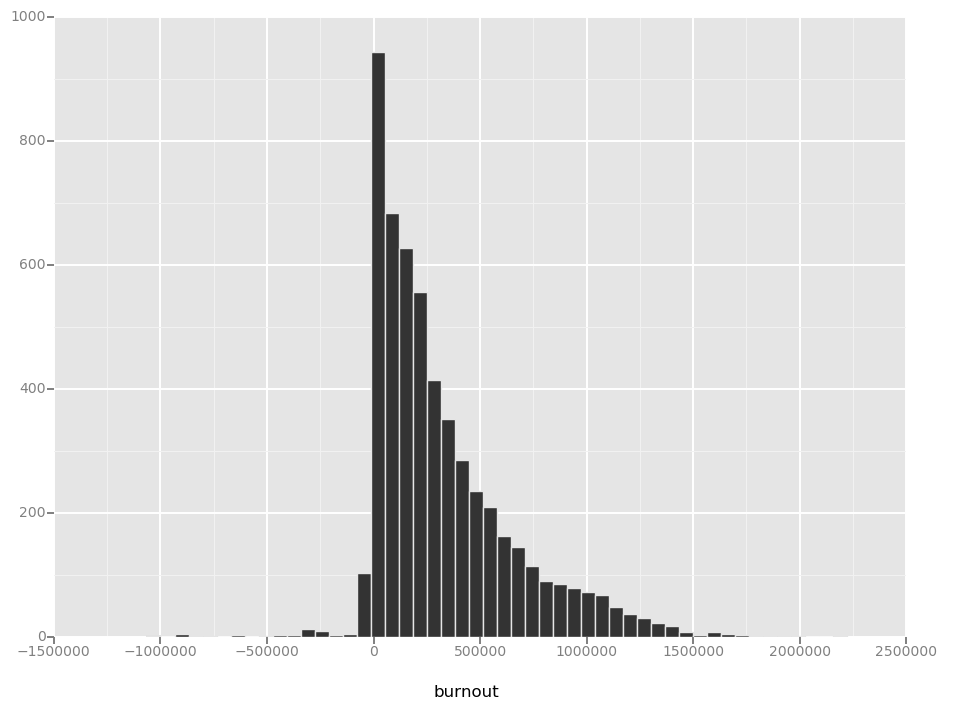

<ggplot: (8784741244897)>

In [10]:
gg.ggplot(jim, gg.aes(x='burnout')) + gg.geom_histogram(bins=50)

In [11]:
jim.shape

(5468, 10)

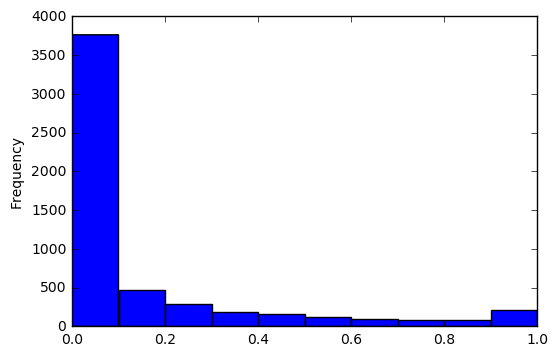

In [12]:
jim.next_month_cpr.plot.hist()